  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (to

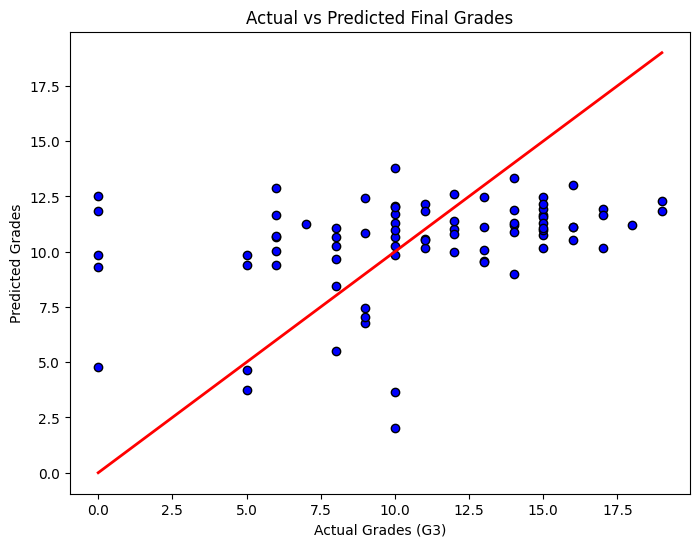

               Coefficient
studytime         0.813250
failures         -2.265819
absences          0.050797
sex               1.229967
goout            -0.279632
famsize_LE3       0.592940
schoolsup_yes    -0.490974
famsup_yes       -0.647604


In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import zipfile
import io
import requests

# Step 1: Load the dataset (Student Performance Dataset from UCI repository)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip"
response = requests.get(url)
with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    with z.open("student-mat.csv") as f:
        df = pd.read_csv(f, sep=';')

# Step 2: Data inspection
print(df.head())  # Display the first 5 rows of the dataset
print(df.info())  # Display summary of the dataset

# Step 3: Preprocessing (Encode categorical features)
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])  # Encode gender as 0 or 1
df['school'] = label_encoder.fit_transform(df['school'])  # Encode school as 0 or 1

# Step 4: Selecting features and target
# Using relevant features related to student's performance like study time, failures, absences
features = ['studytime', 'failures', 'absences', 'sex', 'famsize', 'schoolsup', 'famsup', 'goout']
target = 'G3'  # Final grade

X = df[features]
y = df[target]

# Step 5: Convert categorical variables into numerical ones if necessary
X = pd.get_dummies(X, drop_first=True)

# Step 6: Split dataset into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Initialize the Linear Regression model
model = LinearRegression()

# Step 8: Train the model
model.fit(X_train, y_train)

# Step 9: Make predictions on the test data
y_pred = model.predict(X_test)

# Step 10: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# Step 11: Visualize the actual vs predicted grades
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # Perfect prediction line
plt.xlabel('Actual Grades (G3)')
plt.ylabel('Predicted Grades')
plt.title('Actual vs Predicted Final Grades')
plt.show()

# Optional: Plot feature importance (coefficients) to understand the impact of each feature
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)
